In [1]:
print('vocal')

vocal


In [2]:
import os
import pandas as pd
import numpy as np


In [3]:
RAVDESS = "/path/voice/archive/audio_speech_actors_01-24/"
TESS = "/path/voice/TESS Toronto emotional speech set data/"
SAVEE = "/path/Downloads/voice/ALL_suurey/"

In [4]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files: 
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])
            
ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()          

FileNotFoundError: [Errno 2] No such file or directory: '/path/voice/archive/audio_speech_actors_01-24/'

In [ ]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = [] 

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    
    for audio_file in audio_files:
        try:
            part = audio_file.split('.')[0]
            key = part.split('_')[2]
            if key in emotion_dic:
                path_list.append(f"{TESS}{directory}/{audio_file}") 
                gender_list.append('female') # female only dataset
                emotion_list.append(emotion_dic[key])
        except:
            pass
                       
tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()

,path,sex,emotion
0,/Users/usama/Downloads/voice/TESS Toronto emot...,female,disgust
1,/Users/usama/Downloads/voice/TESS Toronto emot...,female,disgust
2,/Users/usama/Downloads/voice/TESS Toronto emot...,female,disgust
3,/Users/usama/Downloads/voice/TESS Toronto emot...,female,disgust
4,/Users/usama/Downloads/voice/TESS Toronto emot...,female,disgust


In [ ]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])
        
savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()

,path,sex,emotion
0,/Users/usama/Downloads/voice/ALL_suurey/JK_sa0...,male,sad
1,/Users/usama/Downloads/voice/ALL_suurey/JK_sa1...,male,sad
2,/Users/usama/Downloads/voice/ALL_suurey/DC_n13...,male,neutral
3,/Users/usama/Downloads/voice/ALL_suurey/DC_n07...,male,neutral
4,/Users/usama/Downloads/voice/ALL_suurey/JK_n20...,male,neutral


In [ ]:
df = pd.concat([
    ravdess_df, 
    tess_df, 
    savee_df
], axis=0)
df.head()

,path,sex,emotion
0,/Users/usama/Downloads/voice/archive/audio_spe...,female,angry
1,/Users/usama/Downloads/voice/archive/audio_spe...,female,fear
2,/Users/usama/Downloads/voice/archive/audio_spe...,female,fear
3,/Users/usama/Downloads/voice/archive/audio_spe...,female,angry
4,/Users/usama/Downloads/voice/archive/audio_spe...,female,disgust


In [ ]:
import librosa
import matplotlib.pyplot as plt

plt.style.use('ggplot')

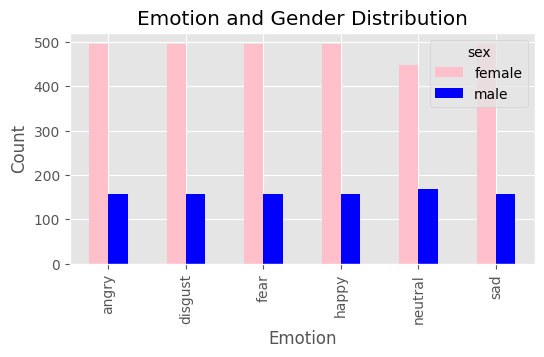

In [ ]:
def plot_distribution(df): 
    countTable = df.groupby(['emotion', 'sex']).count()
    pivotTable = countTable.pivot_table(index='emotion', columns='sex', values='path')

    pivotTable.plot(kind='bar', figsize=(6, 3), color=['pink', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()
    
plot_distribution(df)

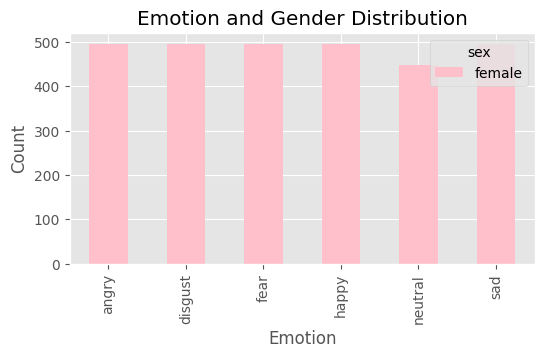

In [ ]:
df = df[df['sex'] == 'female']
plot_distribution(df)

In [ ]:
df.drop('sex', axis=1, inplace=True)
df.head()

,path,emotion
0,/Users/usama/Downloads/voice/archive/audio_spe...,angry
1,/Users/usama/Downloads/voice/archive/audio_spe...,fear
2,/Users/usama/Downloads/voice/archive/audio_spe...,fear
3,/Users/usama/Downloads/voice/archive/audio_spe...,angry
4,/Users/usama/Downloads/voice/archive/audio_spe...,disgust


In [ ]:
from pydub import AudioSegment, effects

/Users/usama/anaconda3/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [ ]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)
    
    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    return padded, sr

In [ ]:
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2, 
    'angry'   : 3, 
    'fear'    : 4, 
    'disgust' : 5
}

def encode(label):
    return emotion_dic.get(label)

 Extract features

In [ ]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try: 
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

Failed for path: /Users/usama/Downloads/voice/archive/audio_speech_actors_01-24/Actor_20/03-01-06-01-01-02-20.wav


/Users/usama/anaconda3/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


Failed for path: /Users/usama/Downloads/voice/TESS Toronto emotional speech set data/YAF_fear/YAF_neat_fear.wav


/Users/usama/anaconda3/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


Failed for path: /Users/usama/Downloads/voice/TESS Toronto emotional speech set data/YAF_angry/YAF_germ_angry.wav


In [ ]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

Build a LSTM

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [ ]:
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.15, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 6)
y_val_class = to_categorical(y_val, 6)

In [ ]:

from tensorflow.keras.models import Sequential
from keras import layers, optimizers, callbacks, Model

In [ ]:
model = Sequential()
model.add(layers.LSTM(64, return_sequences=True, input_shape=(X.shape[1:3])))
model.add(layers.LSTM(64))
model.add(layers.Dense(6, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 352, 64)           20480     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 53894 (210.52 KB)
Trainable params: 53894 (210.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=70)
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
his = model.fit(X_train, y_train_class, epochs=50, batch_size=32, validation_data=(X_val, y_val_class))

Epoch 1/50
78/78 [==============================] - 19s 218ms/step - loss: 1.5674 - categorical_accuracy: 0.3524 - val_loss: 1.4820 - val_categorical_accuracy: 0.3681
Epoch 2/50
78/78 [==============================] - 16s 211ms/step - loss: 1.4206 - categorical_accuracy: 0.3894 - val_loss: 1.4165 - val_categorical_accuracy: 0.3844
Epoch 3/50
78/78 [==============================] - 17s 214ms/step - loss: 1.3226 - categorical_accuracy: 0.4566 - val_loss: 1.3142 - val_categorical_accuracy: 0.4691
Epoch 4/50
78/78 [==============================] - 16s 211ms/step - loss: 1.2608 - categorical_accuracy: 0.4883 - val_loss: 1.3113 - val_categorical_accuracy: 0.4951
Epoch 5/50
78/78 [==============================] - 16s 211ms/step - loss: 1.2223 - categorical_accuracy: 0.5008 - val_loss: 1.2346 - val_categorical_accuracy: 0.5049
Epoch 6/50
78/78 [==============================] - 16s 210ms/step - loss: 1.1677 - categorical_accuracy: 0.5253 - val_loss: 1.3154 - val_categorical_accuracy: 0.511

In [ ]:
model.save('/Users/usama/Downloads/voice/my_model_weights_50epo_female.h5')

/Users/usama/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluate and conclude

In [ ]:
from sklearn.metrics import confusion_matrix

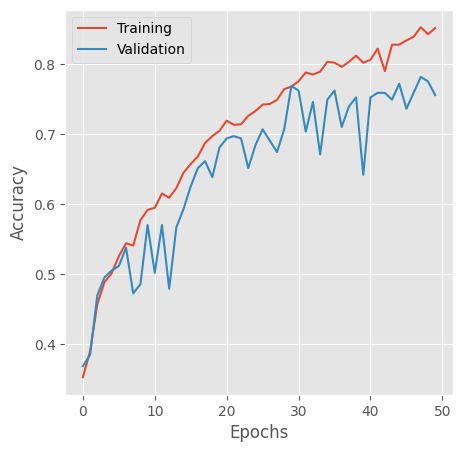

In [ ]:
plt.figure(figsize=(5, 5)) 
plt.plot(his.history['categorical_accuracy'])
plt.plot(his.history['val_categorical_accuracy'])
plt.ylabel('Accuracy') 
plt.xlabel('Epochs') 
plt.legend(['Training','Validation']) 
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('/Users/usama/Downloads/voice/my_model_weights_100epo.h5')

In [ ]:
plt.figure(figsize=(5, 5)) 
plt.plot(model.history['categorical_accuracy'])
plt.plot(model.history['val_categorical_accuracy'])
plt.ylabel('Accuracy') 
plt.xlabel('Epochs') 
plt.legend(['Training','Validation']) 
plt.show()

TypeError: 'NoneType' object is not subscriptable

<Figure size 500x500 with 0 Axes>